In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket.csv')
df.head()

,Invoice ID,Date,Time,Gender,Location,City,Member,Category,Price,Quantity,Total,Payment,Rating
0,460489604,1/25/2018,16:46,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,Cash,2
1,471006167,3/19/2018,16:48,Female,Water tower,Chicago,Yes,Fashion,35,5,175,Card,3
2,411909258,2/25/2018,13:33,Male,Water tower,Chicago,No,Clothing,57,2,114,Cash,5
3,487313402,1/22/2018,13:38,Female,Park lane,Dallas,Yes,Sporting,89,4,356,Gpay,1
4,197763430,2/18/2018,15:31,Female,Park lane,Dallas,No,Books,82,5,410,Cash,4


In [3]:
df.describe()

,Invoice ID,Price,Quantity,Total,Rating
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.944931e+08,51.112000,4.059000,207.788000,2.972000
std,2.870685e+08,28.912443,2.027716,165.626167,1.428025
min,6.614050e+05,1.000000,1.000000,1.000000,1.000000
25%,2.508726e+08,27.000000,2.000000,72.000000,2.000000
50%,4.781491e+08,51.000000,4.000000,174.000000,3.000000
75%,7.459453e+08,76.250000,6.000000,304.500000,4.000000
max,9.996658e+08,100.000000,7.000000,693.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Invoice ID  1000 non-null   int64 
 1   Date        1000 non-null   object
 2   Time        1000 non-null   object
 3   Gender      1000 non-null   object
 4   Location    1000 non-null   object
 5   City        1000 non-null   object
 6   Member      1000 non-null   object
 7   Category    1000 non-null   object
 8   Price       1000 non-null   int64 
 9   Quantity    1000 non-null   int64 
 10  Total       1000 non-null   int64 
 11  Payment     1000 non-null   object
 12  Rating      1000 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [5]:
df.isnull().sum()

Invoice ID    0
Date          0
Time          0
Gender        0
Location      0
City          0
Member        0
Category      0
Price         0
Quantity      0
Total         0
Payment       0
Rating        0
dtype: int64

In [6]:
df = df.drop(['Invoice ID', 'Date', 'Time'], axis = 1)

In [20]:

df['Payment'].unique()

array(['Cash', 'Card', 'Gpay'], dtype=object)

In [21]:
df = df.drop(['Payment'],  axis=1)

In [22]:
df.head(5)

,Gender,Location,City,Member,Category,Price,Quantity,Total,Rating
0,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,2
1,Female,Water tower,Chicago,Yes,Fashion,35,5,175,3
2,Male,Water tower,Chicago,No,Clothing,57,2,114,5
3,Female,Park lane,Dallas,Yes,Sporting,89,4,356,1
4,Female,Park lane,Dallas,No,Books,82,5,410,4


In [23]:
print(df.shape)
df['Gender'].value_counts()

(1000, 9)


Female    501
Male      499
Name: Gender, dtype: int64

C:\Users\geeth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

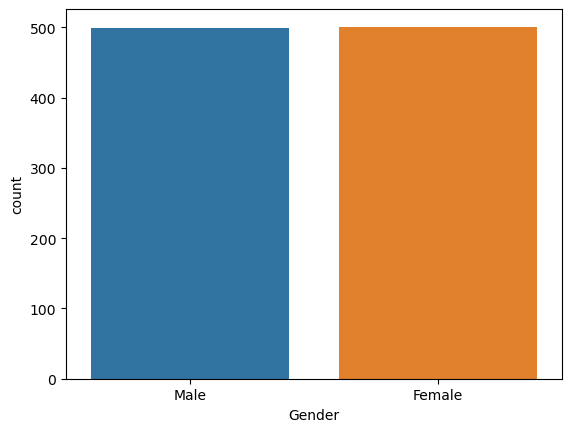

In [24]:
sns.countplot('Gender' , data = df)


In [25]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [26]:
df = pd.concat([df, gender_dummies], axis = 1)
df.head()

,Gender,Location,City,Member,Category,Price,Quantity,Total,Rating,Female,Male
0,Male,Brookfield,NewYork,Yes,Groceries,30,1,30,2,0,1
1,Female,Water tower,Chicago,Yes,Fashion,35,5,175,3,1,0
2,Male,Water tower,Chicago,No,Clothing,57,2,114,5,0,1
3,Female,Park lane,Dallas,Yes,Sporting,89,4,356,1,1,0
4,Female,Park lane,Dallas,No,Books,82,5,410,4,1,0


<AxesSubplot:xlabel='Location', ylabel='Female'>

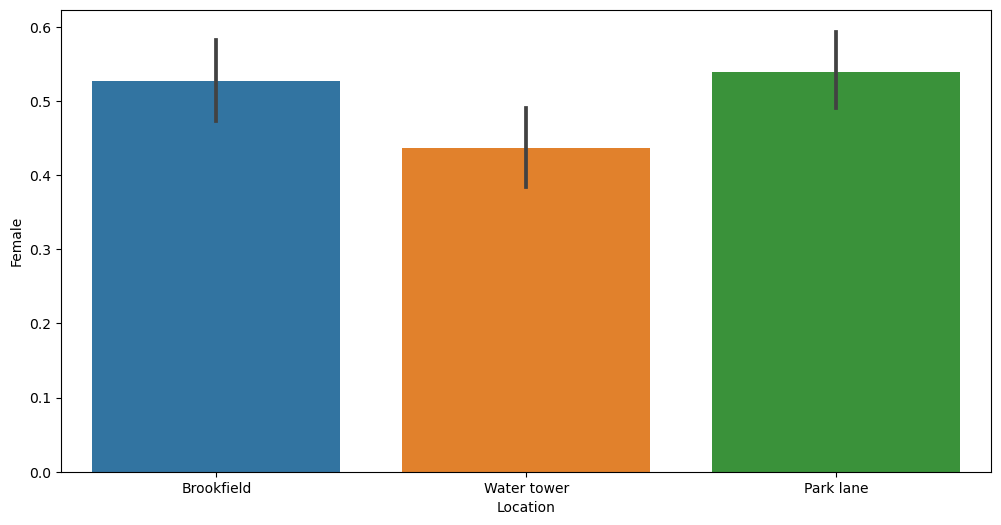

In [28]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Location', y = 'Female', data = df)

<AxesSubplot:xlabel='Location', ylabel='Male'>

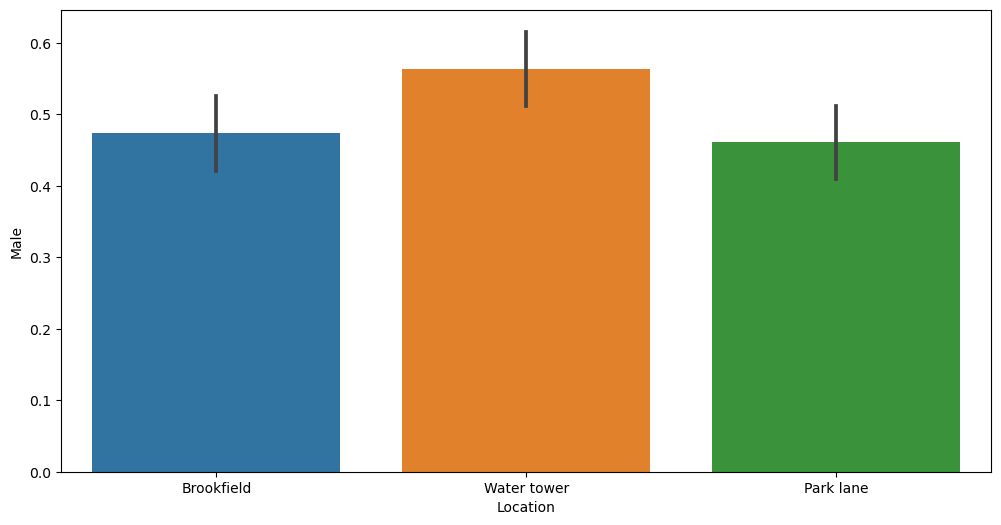

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Location', y = 'Male', data = df)

In [30]:
place_df = pd.DataFrame(df['City'].value_counts())
place_df

,City
NewYork,340
Dallas,332
Chicago,328


<AxesSubplot:ylabel='City'>

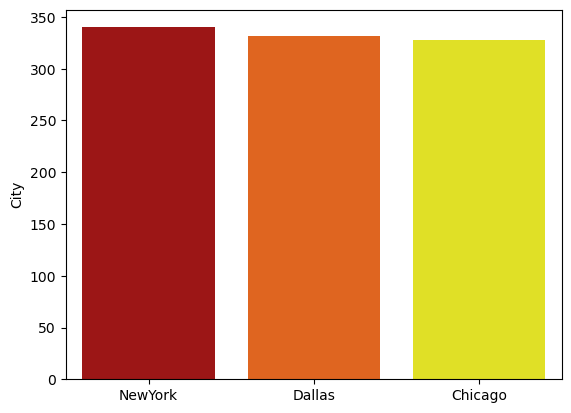

In [31]:
sns.barplot(x = place_df.index  , y = place_df['City'], palette = 'hot')

In [37]:
price_df = pd.DataFrame(df['Price'].value_counts())
price_df

,Price
56,17
34,16
5,16
65,16
51,16
...,...
15,5
13,5
17,4
20,4


<AxesSubplot:ylabel='Price'>

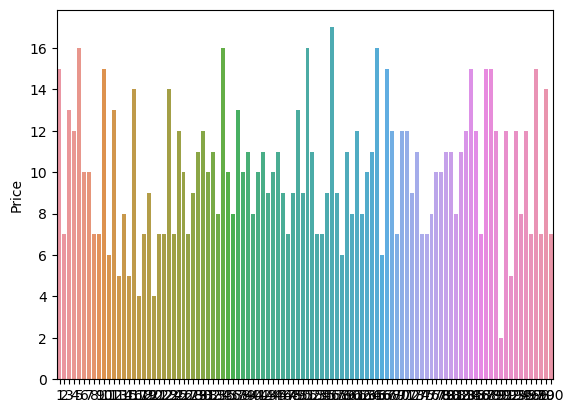

In [39]:
sns.barplot(x =price_df.index , y = price_df.Price)

<AxesSubplot:xlabel='Location', ylabel='Total'>

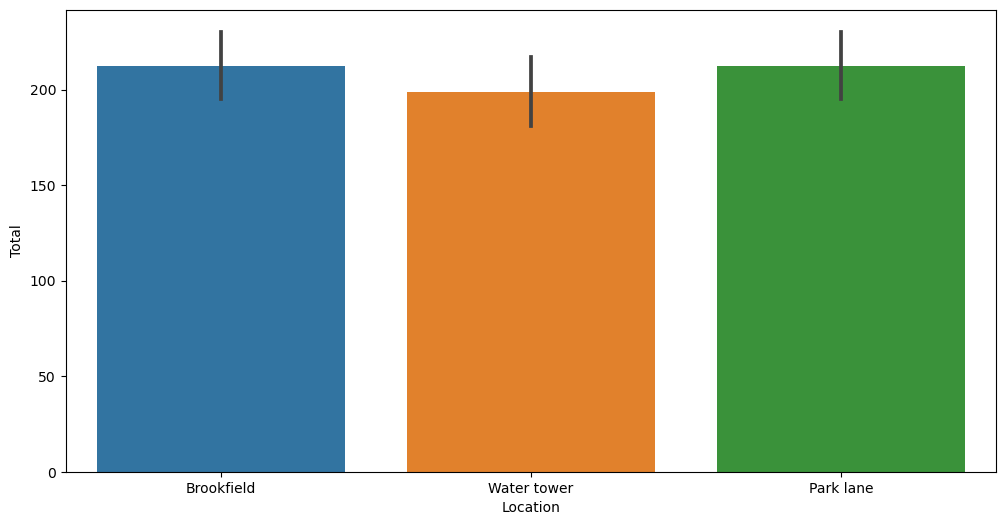

In [43]:
plt.figure(figsize= (12,6))
sns.barplot(x = df['Location'], y = df['Total'])

([<matplotlib.axis.XTick at 0x22d01328580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

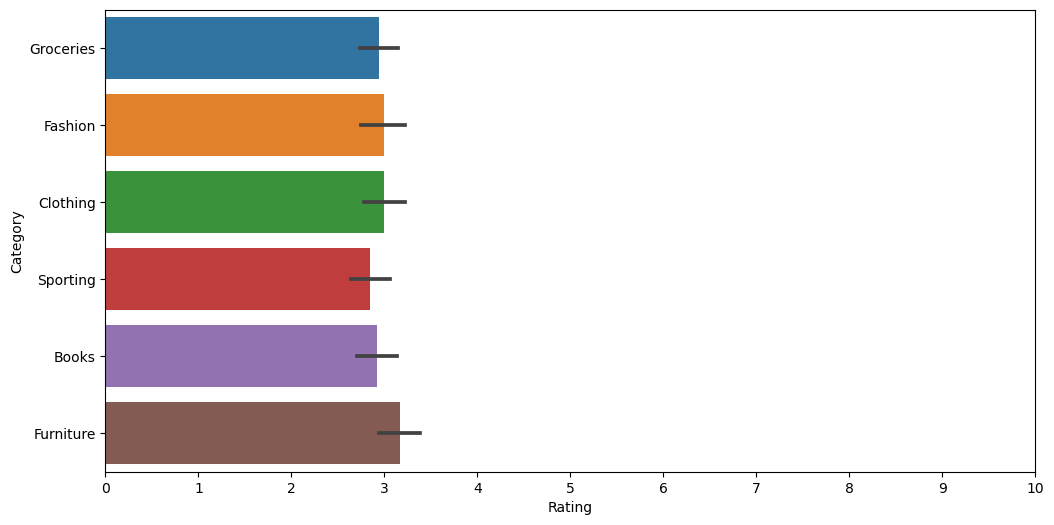

In [46]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Category'], x = df['Rating'])
plt.xticks(xdata)

<AxesSubplot:xlabel='Total', ylabel='Quantity'>

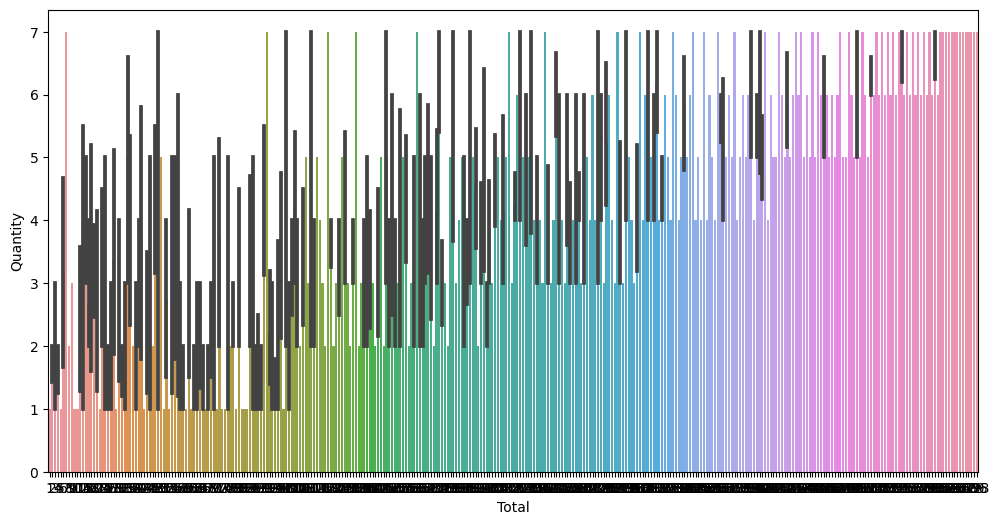

In [48]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Total'] , y = df['Quantity'])

C:\Users\geeth\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x22d01583460>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

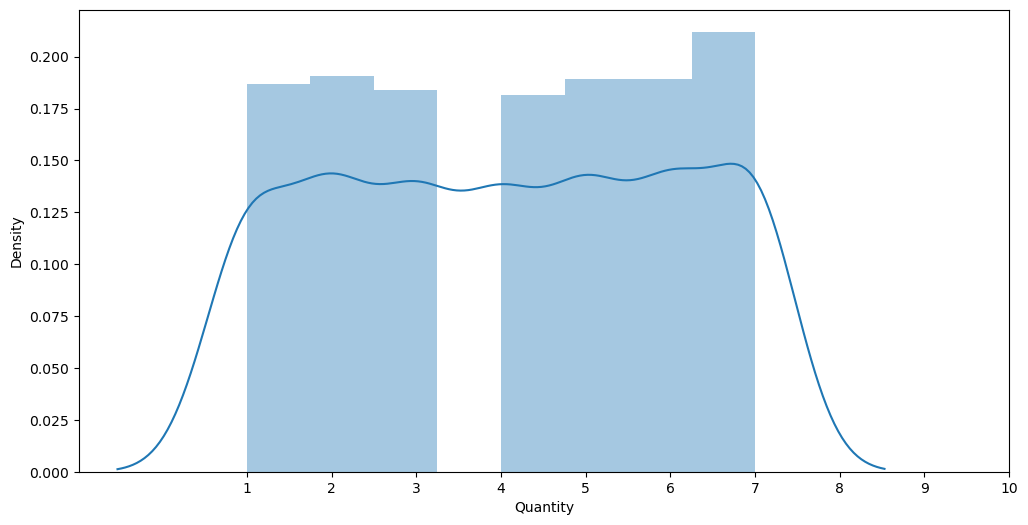

In [49]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'])
plt.xticks(xdata)

In [50]:
quantity_df = pd.DataFrame(df['Quantity'].value_counts())
quantity_df

,Quantity
7,159
2,143
5,142
6,142
1,140
3,138
4,136


<AxesSubplot:ylabel='Quantity'>

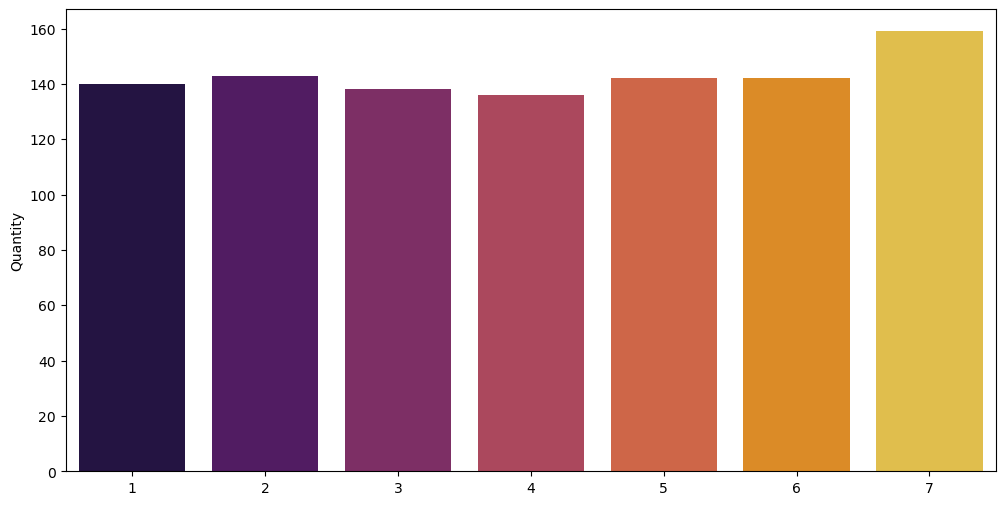

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(x = quantity_df.index , y = quantity_df['Quantity'] , palette = 'inferno')

<AxesSubplot:>

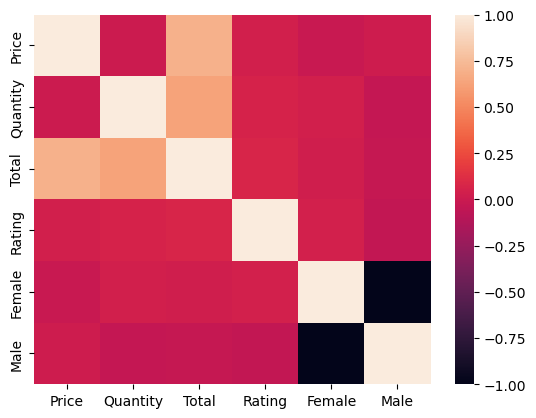

In [52]:
sns.heatmap(df.corr())